In [3]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## 4.1 선형회귀

### 4.1.1 정규방정식
-> 비용 함수를 최소화하는 θ값을 찾기 위한 해석적인 방법
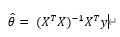
#### 정규 방정식을 사용한 선형 회귀

In [1]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

(0.0, 2.0, 0.0, 15.0)

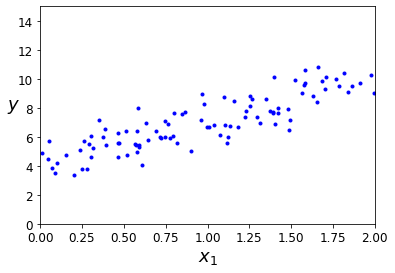

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

In [6]:
X_b = np.c_[np.ones((100, 1)), X]  # https://rfriend.tistory.com/352
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  #inv: 역행렬 함수

In [13]:
theta_best   #θ0 = 4.17, θ1 = 2.94

array([[4.16833939],
       [2.94123919]])

θ ̂을 사용해 y 예측

In [14]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.16833939],
       [10.05081778]])

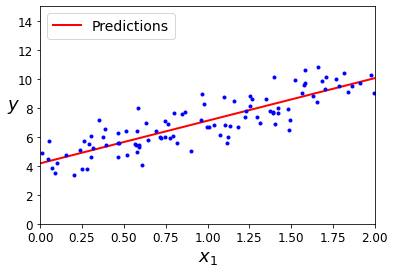

In [17]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

사이킷런에서 선형회귀 수행

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_   #편향(bias), 가중치(weight)

(array([4.16833939]), array([[2.94123919]]))

In [21]:
lin_reg.predict(X_new)

array([[ 4.16833939],
       [10.05081778]])

LinearRegression 클래스는 scipy.linalg.lstsq()를 기반으로 함. 이 함수 직접 호출 가능


θ ̂= X^+ y 계산
-> X^+는 X의 유사 역행렬(np.linalg.pinv()함수를 사용해 직접 구할 수 있음)

In [22]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.16833939],
       [2.94123919]])

In [23]:
np.linalg.pinv(X_b).dot(y)

array([[4.16833939],
       [2.94123919]])